## This project analyses the dataset of black friday sales and makes some important observations out of the analysis.

#### > the intermediate observations are written after every section
#### > the overall observations are written at the end of the complete code
####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link = 'BlackFriday.csv'

In [3]:
data = pd.read_csv(link)
df = pd.DataFrame(data)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()    # gives basic info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
#checking for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
# deleting the columns for product category 2 and 3 since they 
#have a lot of null values and we still have sufficient info without those two
del df['Product_Category_2']
del df['Product_Category_3']
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [7]:
# finding number of unique users
len(df['User_ID'].unique())

5891

In [8]:
# finding number of unique products
len(df['Product_ID'].unique())

3623

In [9]:
# finding age categories
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
# finding number of occupations, each occupation is represented by a number
len(df['Occupation'].unique())

21

In [11]:
# finding city categories
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
# how many years customer living in current city categories
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
#total money spent on sale
df['Purchase'].sum()

5017668378

In [14]:
# finding total amout spent by a given user and product ids purchased
d = df.groupby('User_ID')
user_id = 1000001
purchase = 0
print(d.get_group(user_id)['Purchase'].sum())
l = [x for x in d.get_group(user_id)['Product_ID']]
print(l)

333481
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00085942', 'P00102642', 'P00110842', 'P00004842', 'P00117942', 'P00258742', 'P00142242', 'P00000142', 'P00297042', 'P00059442', 'P0096542', 'P00184942', 'P00051842', 'P00214842', 'P00165942', 'P00111842', 'P00178242', 'P00178342', 'P00183942', 'P00051442', 'P00248442', 'P00210342', 'P00289942', 'P0097142', 'P00255842', 'P00025442', 'P00074142', 'P00058142', 'P00220642', 'P00064042']


#### Analyzing Gender

In [15]:
#finding number of female purchases in every city
A_Female= len(df[(df['Gender']=='F') & (df['City_Category']=='A')])
B_Female= len(df[(df['Gender']=='F') & (df['City_Category']=='B')])
C_Female= len(df[(df['Gender']=='F') & (df['City_Category']=='C')])

In [16]:
#finding number of male purchases in every city
A_male=len(df[(df['Gender']=='M') & (df['City_Category']=='A')])
B_male= len(df[(df['Gender']=='M') & (df['City_Category']=='B')])
C_male= len(df[(df['Gender']=='M') & (df['City_Category']=='C')])


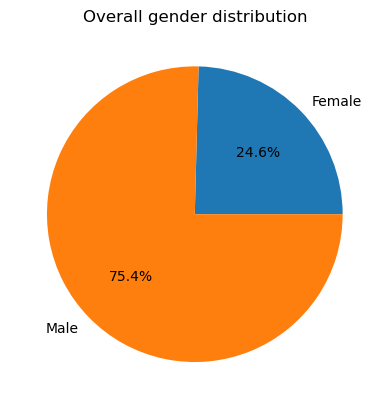

In [17]:
#plotting male-female purchase percentage overall

plt.pie([A_Female+B_Female+C_Female,A_male+B_male+C_male],labels=['Female','Male'],autopct='%1.1f%%')
plt.title('Overall gender distribution')
plt.show()

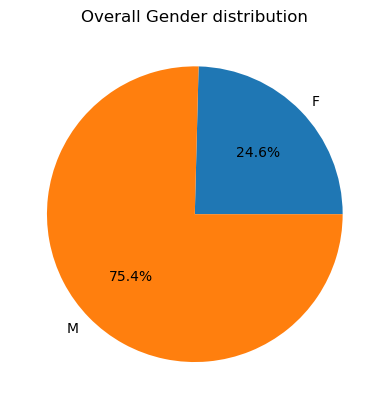

In [18]:
# doing same using groupby function
df.groupby('Gender').size().plot(kind='pie', autopct = '%1.1f%%', title = 'Overall Gender distribution')
plt.show()

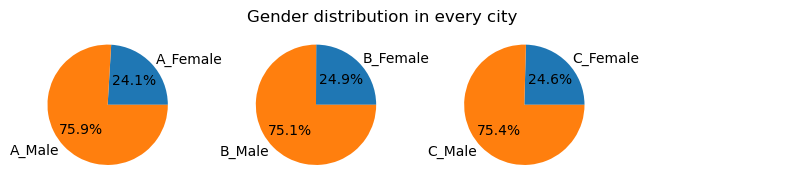

In [19]:
#plotting male-female purchase percentage in every city
fig,ax = plt.subplots(1,3)
plt.tight_layout()
ax[0].pie([A_Female,A_male],labels=['A_Female','A_Male'],autopct='%1.1f%%')
ax[1].pie([B_Female,B_male],labels=['B_Female','B_Male'],autopct='%1.1f%%')
ax[2].pie([C_Female,C_male],labels=['C_Female','C_Male'],autopct='%1.1f%%')
plt.title('Gender distribution in every city                                                      ')
plt.show()

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\2712043421.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct = '%1.1f%%')


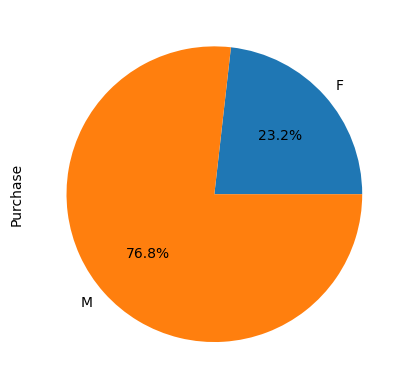

In [20]:
# plotting amount % spent by each gender overall
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct = '%1.1f%%')
plt.show()

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\2480583275.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie', autopct='%1.1f%%', title='Average expenditure per product by each gender')


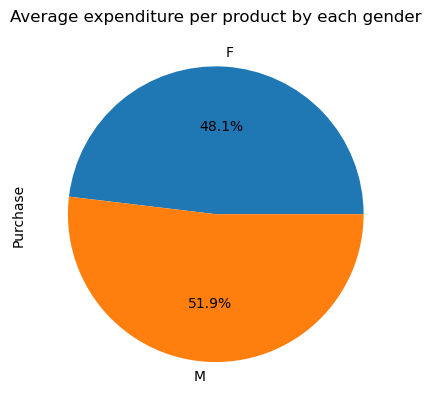

In [21]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie', autopct='%1.1f%%', title='Average expenditure per product by each gender')
plt.show()
# it shows male spend abot 3% more per product on average

### Some observations based on gender:
1. Males purchased significantly more number of products than than females
2. Amount of money spent by males is also significantly more than amount of money spent by females
3. Both males and females spent almost same average amount per product, males spent slightly more per product

#### Analysing Age and Marital Status

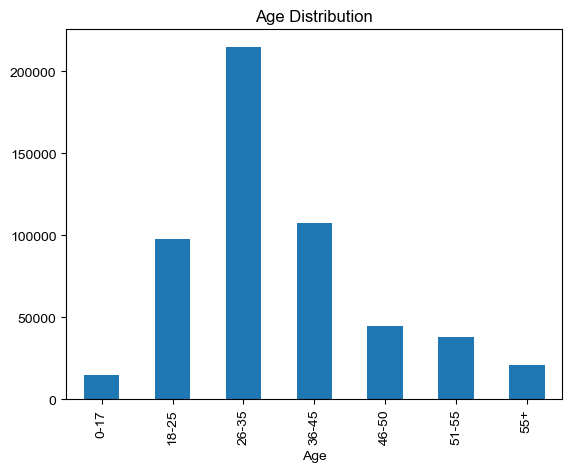

In [22]:
df.groupby('Age').size().plot(kind='bar', title = 'Age Distribution')
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

In [23]:
# printing product_id of top 3 products purchased in every age group
l = {}
for i in df['Age'].unique():
    x = dict(df[df['Age']==i].groupby('Product_ID').size().sort_values(ascending=False)[:3])
    #print(i,' > ',x)
    #print('\n','*'*30,'\n')
    l[i]=x
print(l['0-17'].keys())

dict_keys(['P00255842', 'P00145042', 'P00112142'])


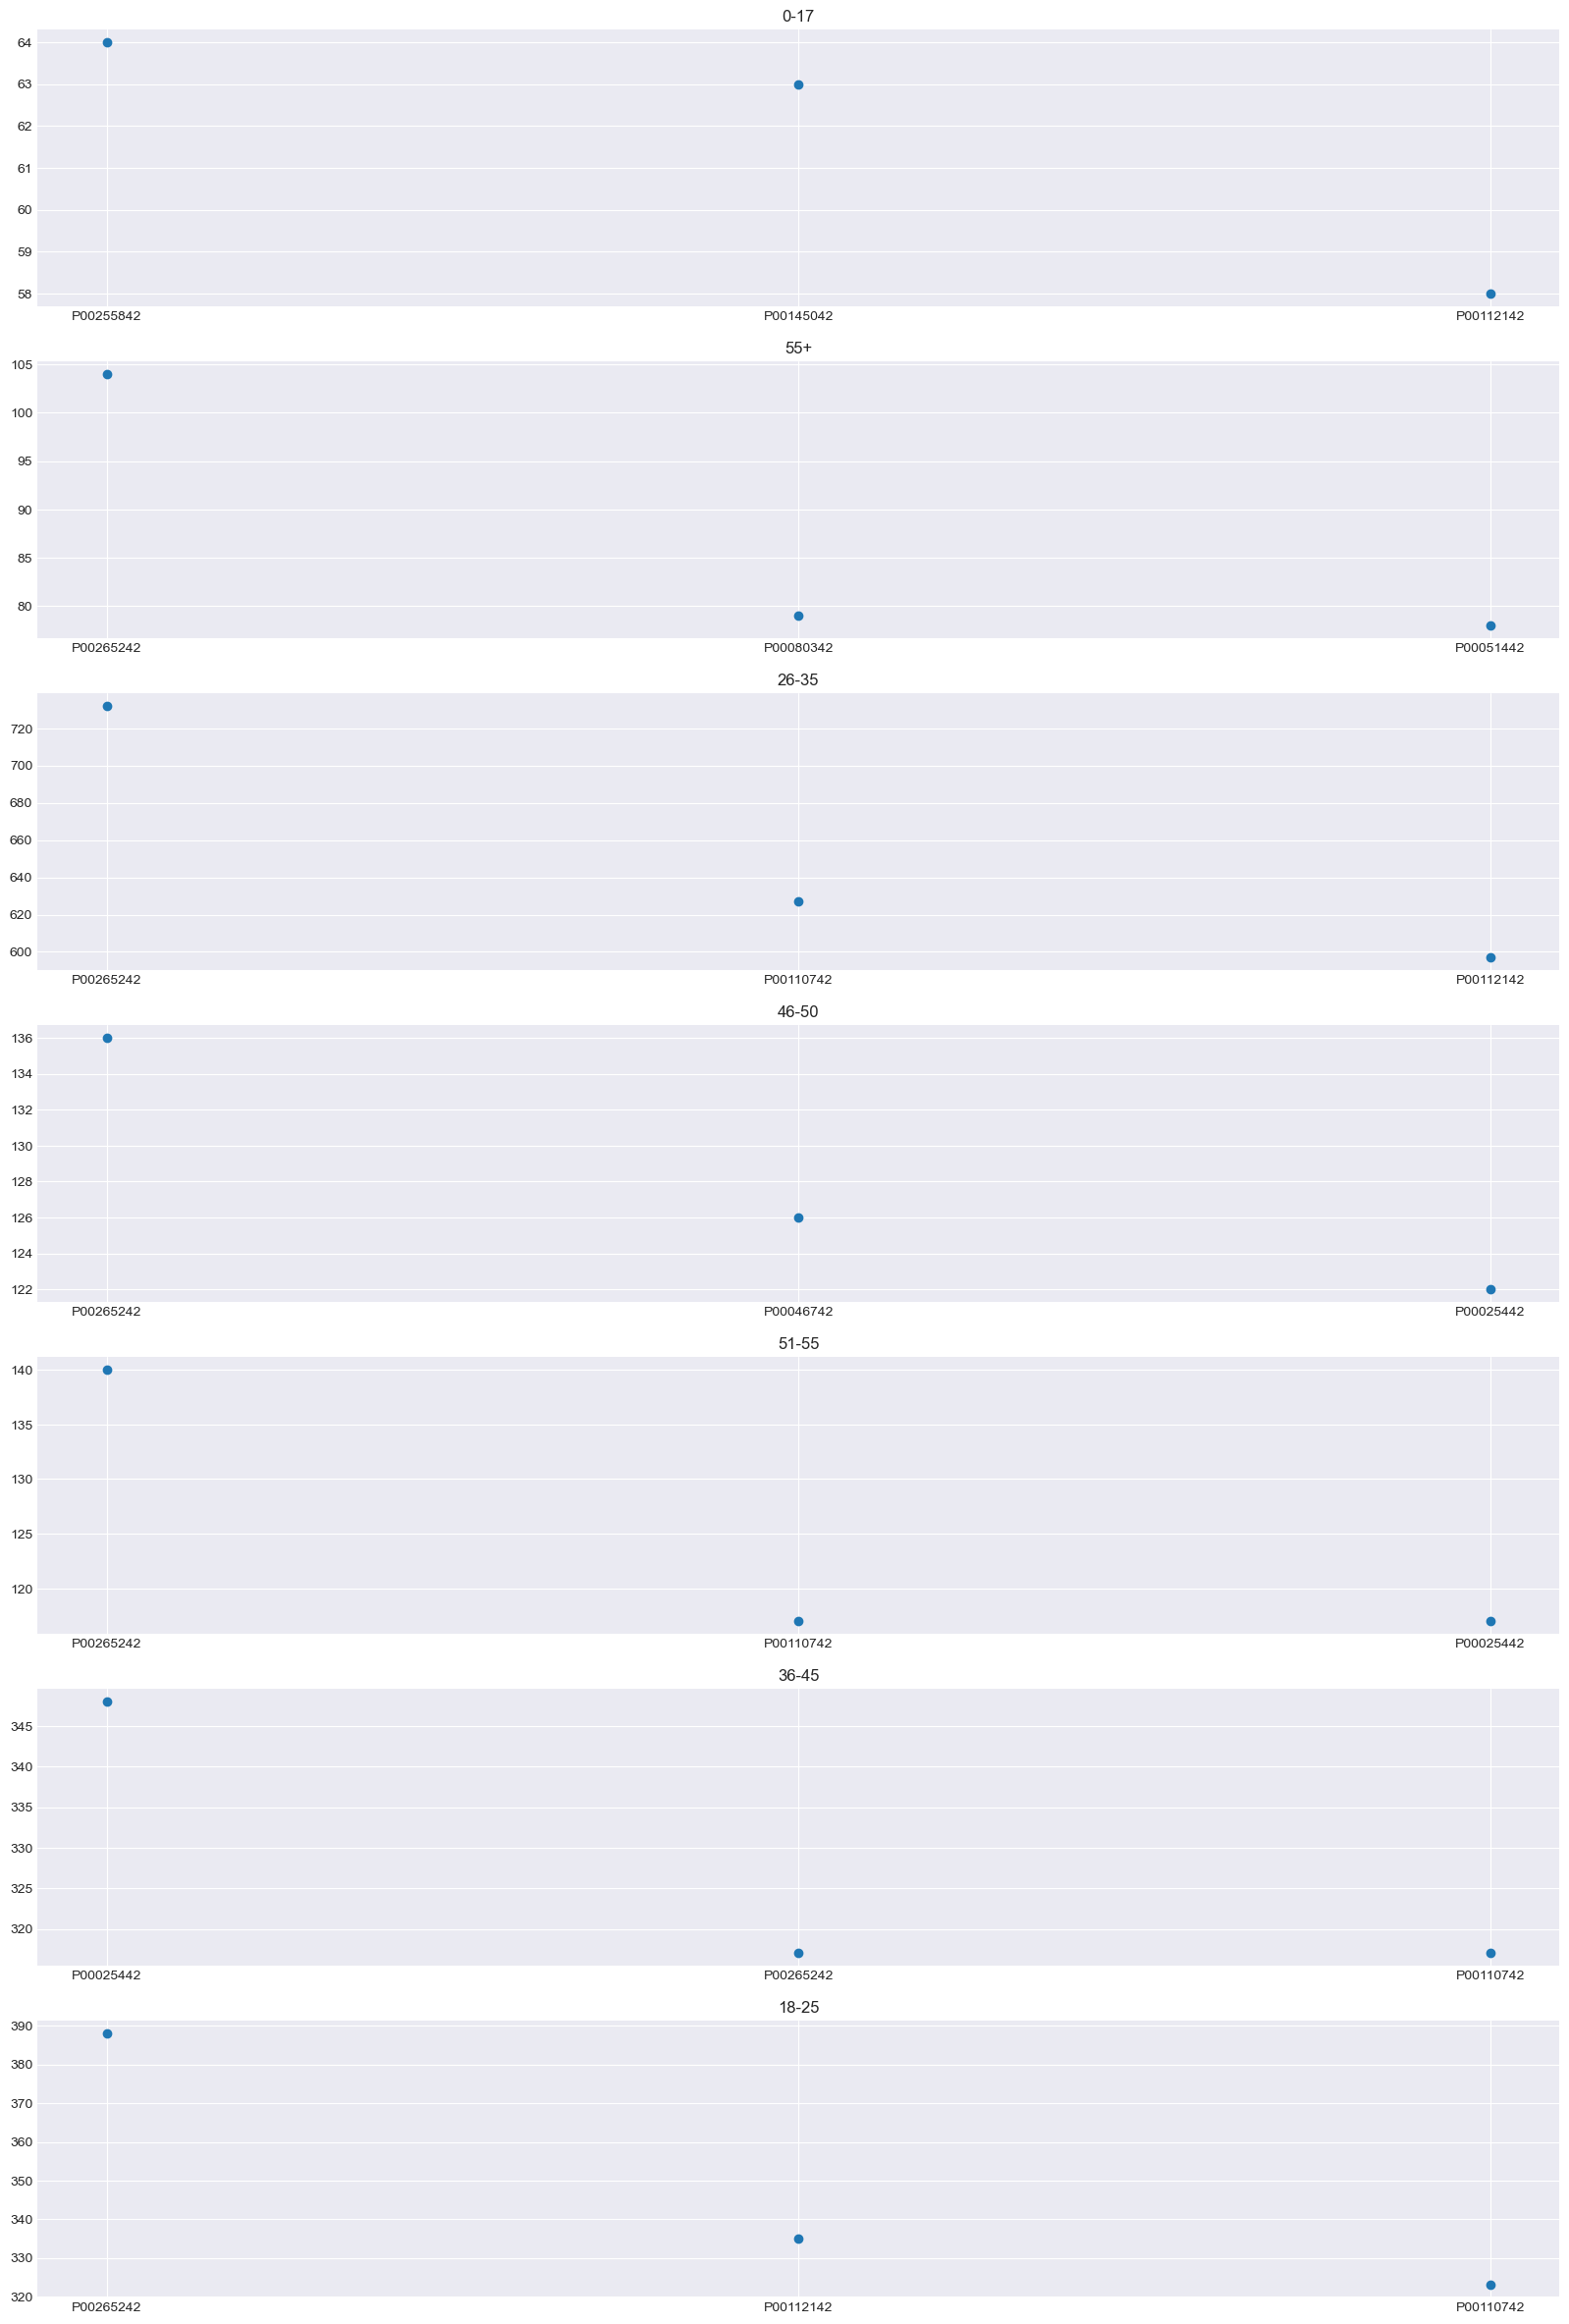

In [24]:
#plotting top 3 products with the amt sold for every age category
fig,ax = plt.subplots(7,1)
t = list(l.keys())
#print(t)
for j in range(7):
    #print(l[t[j]].keys())
    ax[j].scatter(l[t[j]].keys(),l[t[j]].values())
    ax[j].set_title(t[j])

fig.set_figheight(30)
fig.set_figwidth(20)
plt.show()
# we can see product_id P00265242 is purchased the most number of times

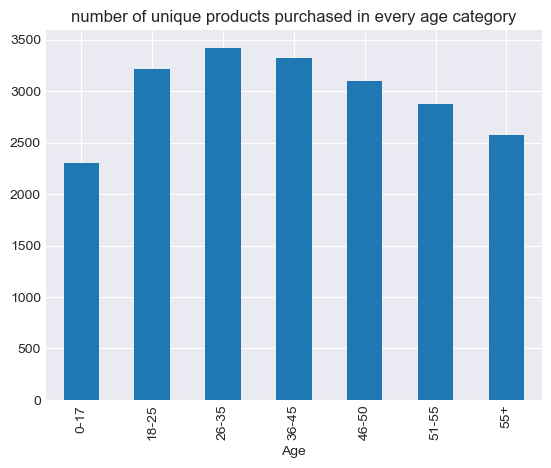

In [25]:
# plotting number of unique products in every age category
df.groupby('Age').nunique()['Product_ID'].plot(kind='bar', title='number of unique products purchased in every age category')
plt.show()

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\3671383850.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind='pie', autopct = '%1.1f%%')


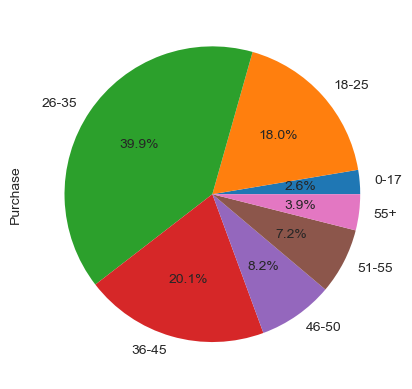

In [26]:
# plotting amt spent by every age group
df.groupby('Age').sum()['Purchase'].plot(kind='pie', autopct = '%1.1f%%')
plt.show()

In [27]:
# we see majority of amount is spent by people in ages 18-45

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\1213599738.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Marital_Status').sum()['Purchase'].plot(kind='bar')


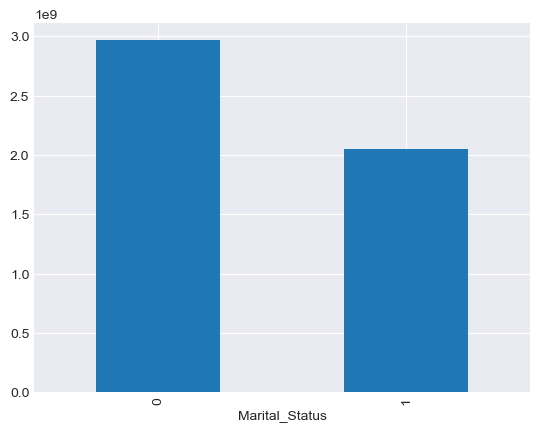

In [28]:
# checking how much married and umarried people are spending
df.groupby('Marital_Status').sum()['Purchase'].plot(kind='bar')
plt.show()

In [29]:
# we see unmarried people are spending significantly more

### Some observations based on age and marital status
1. People in age group 18-45 spent the most
2. Product id was the most popular purchase in general acroos various age groups
3. Unmarried people spent significantly more than married people

#### Analyzing multiple columns

<Axes: xlabel='City_Category', ylabel='count'>

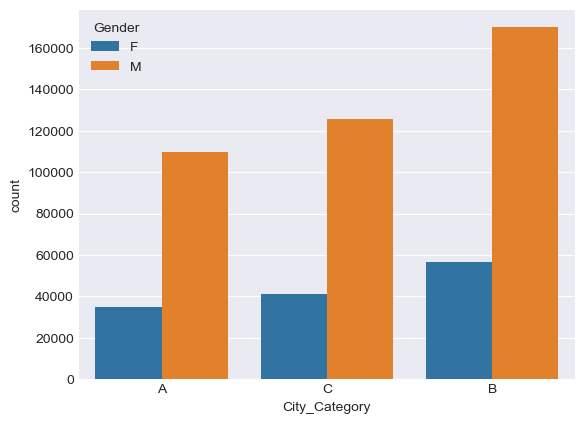

In [30]:
#plotting gender distribution in every city
sns.countplot(x='City_Category',hue='Gender', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

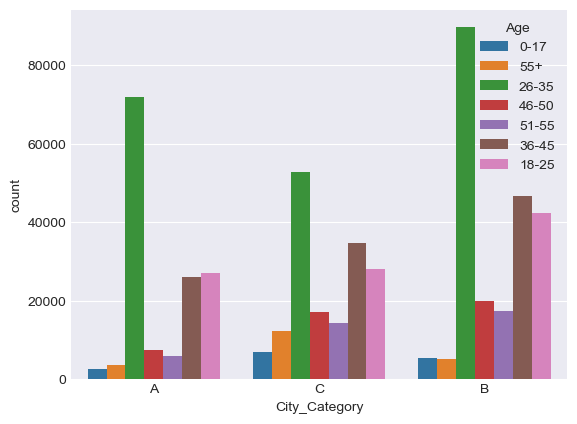

In [31]:
#plotting age distribution in every city
sns.countplot(x='City_Category',hue='Age',data=df)

In [32]:
# we see age 26-35 people which are the highest spenders are more in city B
# in fact the age group 18-45 people are in general more in number in city B

<Axes: xlabel='City_Category', ylabel='count'>

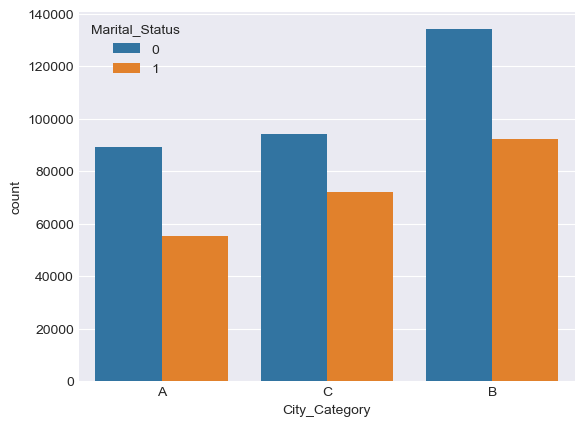

In [33]:
#ploting unmarries and married people in every city
sns.countplot(x='City_Category',hue='Marital_Status', data=df)

In [34]:
# we see number of unmarried people are also highest in city B

### Some observation based on multiple column analysis
1. The people in age group 18-45 are highest in city B
2. The number of unmarried people are highest in city B

#### Occupation and Product analysis

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\1773515790.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')


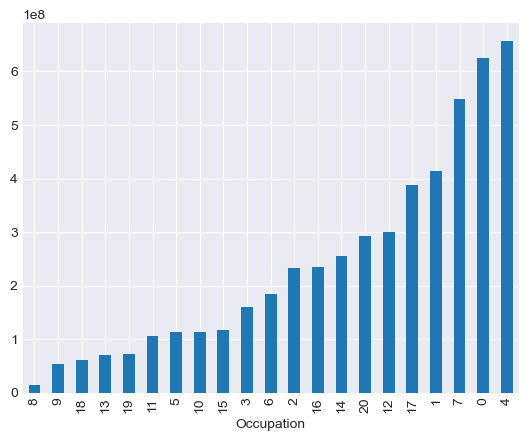

In [35]:
#plotting amt spent by every occupation people
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')
plt.show()

In [36]:
# we see occupations 4,0,7 are spending the most

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\3654759846.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')


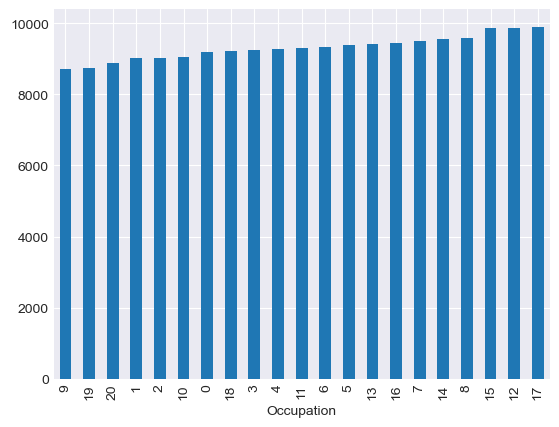

In [37]:
#plotting average proce per product spent by every occupation people
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')
plt.show()

In [38]:
# we see occupation 17 is spending more per product even though they are buying less products means 17 is buying more expensive 
#products

<Axes: xlabel='Product_Category_1'>

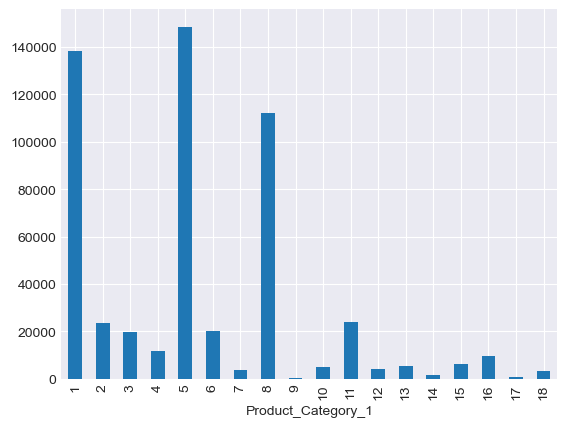

In [39]:
#plotting amt spent on different product_categories
df.groupby('Product_Category_1').size().plot(kind='bar')


In [40]:
# we see product categories 1, 5 and 8 are bringing more sales 

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\848524329.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar')


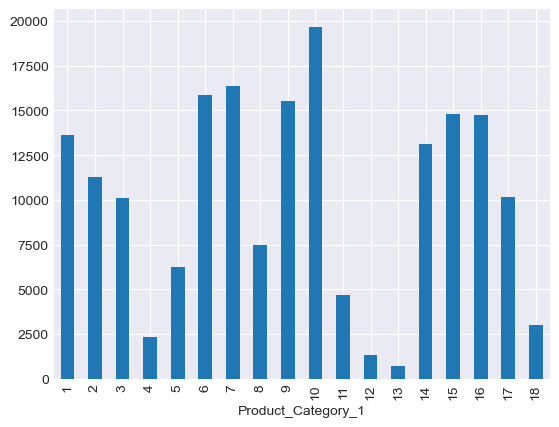

In [41]:
#pltting average price per product for each product category
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar')
plt.show()

In [42]:
#we see product category 10 has comparatively more expensive products

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\3739040942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').mean()['Purchase'].nlargest(10).plot(kind='bar')


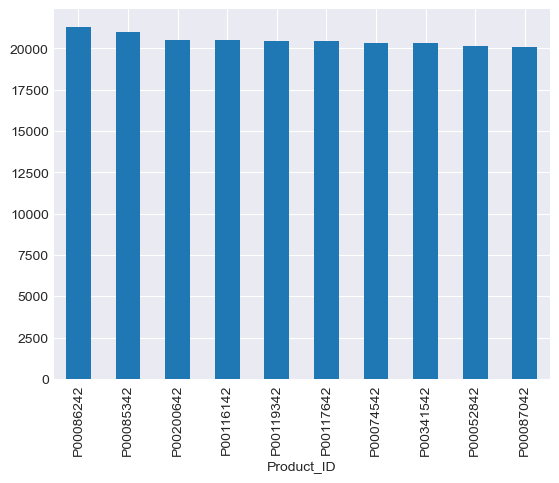

In [43]:
#plotting the 10 most expensive products that is having more price/product
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).plot(kind='bar')

plt.show()

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_18644\3663060131.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')


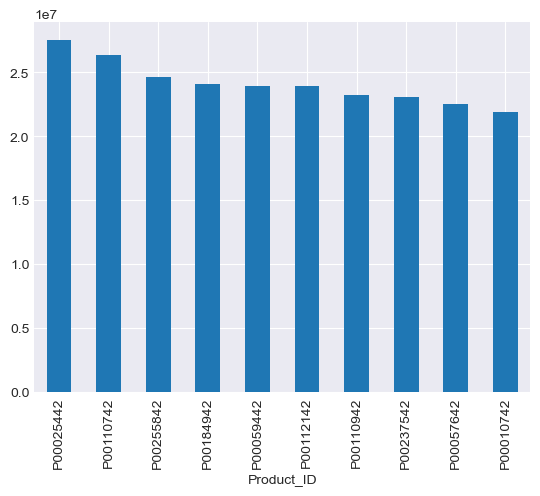

In [44]:
#plotting the products that bought the most sales
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')
plt.show()

### Some observations based on occupation and products analysis
1. occupations 7,0,4 spent the most while occupation 17 purchased comparatively more expensive products
2. People spent more on product categories 1,5,8
3. Product category 10 had more expensive products


#### Combining Gender and Marital status

<Axes: xlabel='Gender', ylabel='count'>

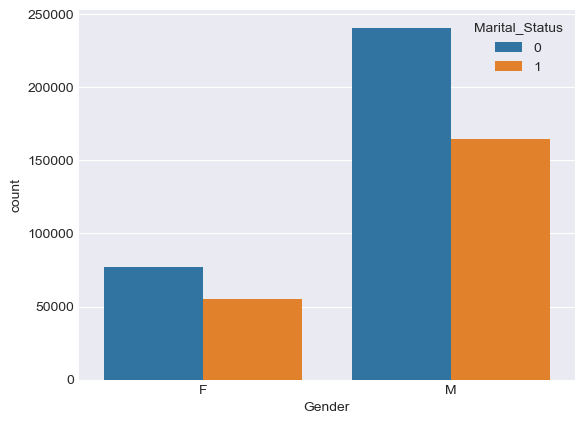

In [45]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)

In [46]:
fu = len(df[(df['Gender']=='F') & (df['Marital_Status']==0)])
fm = len(df[(df['Gender']=='F') & (df['Marital_Status']==1)])
mu = len(df[(df['Gender']=='M') & (df['Marital_Status']==0)])
mm = len(df[(df['Gender']=='M') & (df['Marital_Status']==1)])

print('female_unmarried : ',fu,'\n','female_married : ',fm,'\n','male_unmarried : ',mu,'\n','male_married : ',mm)

female_unmarried :  76974 
 female_married :  55223 
 male_unmarried :  240843 
 male_married :  164537


# Overall Observations
#### 1. Unmarried people spent most
#### 2. Men spent significantly more than women
#### 3. The age group 18-45 spent the most
#### 4. Product ID P00265242 was the most popular choice across various age groups
#### 5. City B have most number of unmarried people and also people spent most money in this city
#### 6. Occupations 4,0,7 spent the most
#### 7. product categories 1,5,8 had the most purchases 